In [1]:
from clustering_utils import *
import matplotlib.pyplot as plt

Load data

In [2]:
X = pd.read_pickle('Data/ACs/Dataframes/control_data_features.pkl')

Kernels & Chirp

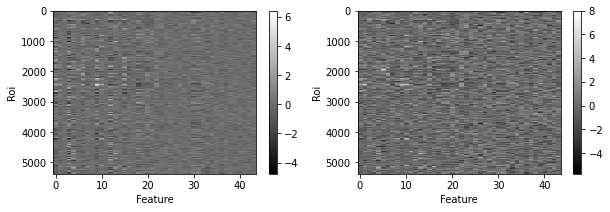

In [3]:
data = np.concatenate((np.vstack(X['pca features color - 3 components'].to_numpy()),
                       np.vstack(X['local_chirp sPCA'].to_numpy()),
                       np.vstack(X['global_chirp sPCA'].to_numpy())), axis = 1)
scaledData = np.zeros_like(data)

# Feature scaling: Mean = 0 and STD = 1 for each feature
for current_index in range(data.shape[1]):
    current_feature = data[:,current_index]
    scaledData[:,current_index] = (current_feature - np.mean(current_feature))/np.std(current_feature)
    
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.imshow(data, aspect = 'auto', cmap = 'binary_r', interpolation = 'None')
plt.ylabel('Roi')
plt.xlabel('Feature')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(scaledData, aspect = 'auto', cmap = 'binary_r', interpolation = 'None')
plt.ylabel('Roi')
plt.xlabel('Feature')
plt.colorbar()
plt.show()

# Run clustering
max_nb_components = 50
nb_replicates = 20
max_iterations = 1000

gmm_results = fit_gmm(data=scaledData, max_nb_components=max_nb_components,
                      nb_replicates=nb_replicates, max_iterations=max_iterations)
gmm_results.to_pickle('Data/ACs/Dataframes/gmm_pcaColor_3Components_Chirp_features.pkl')

Kernels

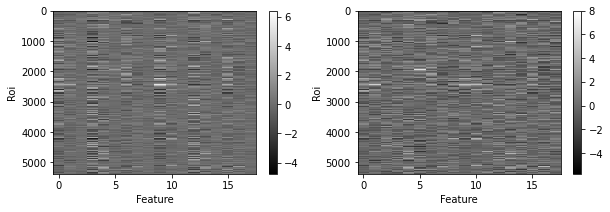

In [4]:
data = np.vstack(X['pca features color - 3 components'].to_numpy())
scaledData = np.zeros_like(data)

# Feature scaling: Mean = 0 and STD = 1 for each feature
for current_index in range(data.shape[1]):
    current_feature = data[:,current_index]
    scaledData[:,current_index] = (current_feature - np.mean(current_feature))/np.std(current_feature)
    
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.imshow(data, aspect = 'auto', cmap = 'binary_r', interpolation = 'None')
plt.ylabel('Roi')
plt.xlabel('Feature')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(scaledData, aspect = 'auto', cmap = 'binary_r', interpolation = 'None')
plt.ylabel('Roi')
plt.xlabel('Feature')
plt.colorbar()
plt.show()

# Run clustering
max_nb_components = 50
nb_replicates = 20
max_iterations = 1000

gmm_results = fit_gmm(data=scaledData, max_nb_components=max_nb_components,
                      nb_replicates=nb_replicates, max_iterations=max_iterations)
gmm_results.to_pickle('Data/ACs/Dataframes/gmm_pcaColor_3Components_features.pkl')